### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/brset/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.DR_3 = df.DR_3.astype(str)
df.head()

,DR_ICDR,DR_2,DR_3,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,0,0,0,train,0.012998,-0.012632,0.010281,0.016375,-0.040752,-0.018974,...,-0.054316,0.026362,0.062661,0.023066,-0.023967,-0.013421,0.033898,-0.058343,0.027308,0.011322
1,0,0,0,test,0.013524,-0.017406,0.012482,0.012262,-0.039934,-0.022396,...,-0.054454,0.018202,0.061717,0.022467,-0.011161,-0.011376,0.030134,-0.049021,0.021231,0.010651
2,0,0,0,train,0.036357,-0.018087,-0.001801,0.010425,-0.036854,-0.019405,...,-0.055949,0.011358,0.072995,0.030307,-0.011789,-0.011042,0.042255,-0.057926,0.033326,0.018503
3,0,0,0,train,0.022021,-0.011668,0.010509,0.022121,-0.035989,-0.023524,...,-0.055314,0.002594,0.074490,0.034430,-0.000350,-0.007918,0.042707,-0.047150,0.027270,0.020940
4,0,0,0,test,0.018684,-0.010326,0.004721,0.006435,-0.045767,-0.025992,...,-0.052848,0.021930,0.068045,0.027663,-0.020903,-0.012616,0.037164,-0.051632,0.033358,0.013019


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_3'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131843


STAGE:2024-02-16 04:00:03 13695:13695 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.8055, macro-f1: 0.5611
Epoch 1/50 - Training Time: 1.05 seconds | Inference Time: 0.22 seconds
Epoch 2/50 - Test Accuracy: 0.8039, macro-f1: 0.5762
Epoch 2/50 - Training Time: 0.98 seconds | Inference Time: 0.24 seconds
Epoch 3/50 - Test Accuracy: 0.8903, macro-f1: 0.6111
Epoch 3/50 - Training Time: 0.90 seconds | Inference Time: 0.25 seconds
Epoch 4/50 - Test Accuracy: 0.8703, macro-f1: 0.6213
Epoch 4/50 - Training Time: 0.93 seconds | Inference Time: 0.24 seconds
Epoch 5/50 - Test Accuracy: 0.8669, macro-f1: 0.6062
Epoch 5/50 - Training Time: 0.89 seconds | Inference Time: 0.26 seconds
Epoch 6/50 - Test Accuracy: 0.8915, macro-f1: 0.6222
Epoch 6/50 - Training Time: 0.90 seconds | Inference Time: 0.27 seconds
Epoch 7/50 - Test Accuracy: 0.9179, macro-f1: 0.6789
Epoch 7/50 - Training Time: 0.90 seconds | Inference Time: 0.27 seconds
Epoch 8/50 - Test Accuracy: 0.8417, macro-f1: 0.6089
Epoch 8/50 - Training Time: 0.93 seconds | Inference Time: 0.25 seconds


STAGE:2024-02-16 04:01:15 13695:13695 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-16 04:01:16 13695:13695 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        10.09%        5.542s        50.93%       27.979s       2.743ms      -2.49 Gb      -2.52 Gb         10200  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        43.29%       23.781s        43.88%       24.108s       1.876ms       3.11 Gb       3.10 Gb         12850  
                              Optimizer.step#AdamW.step         6.76%        3.713s        18.80%       10.328s       1.013ms       1.01 Mb      -9.95

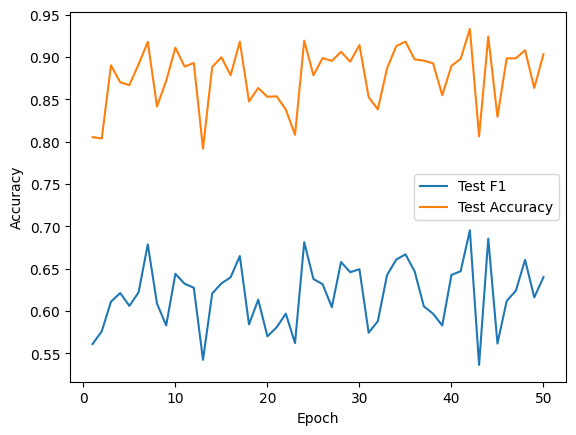

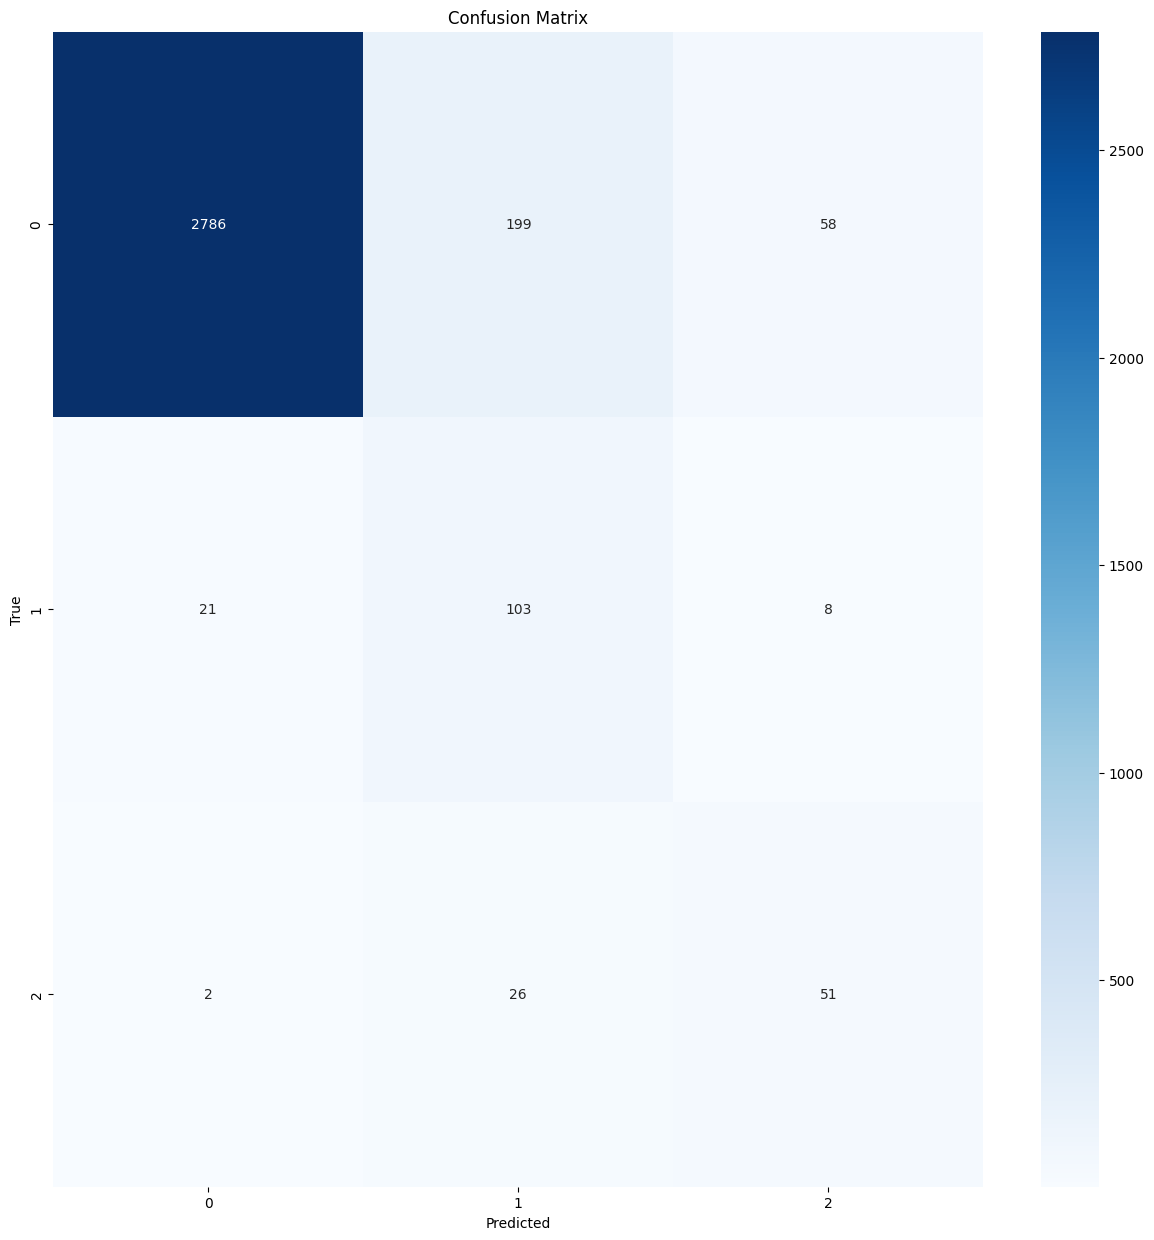

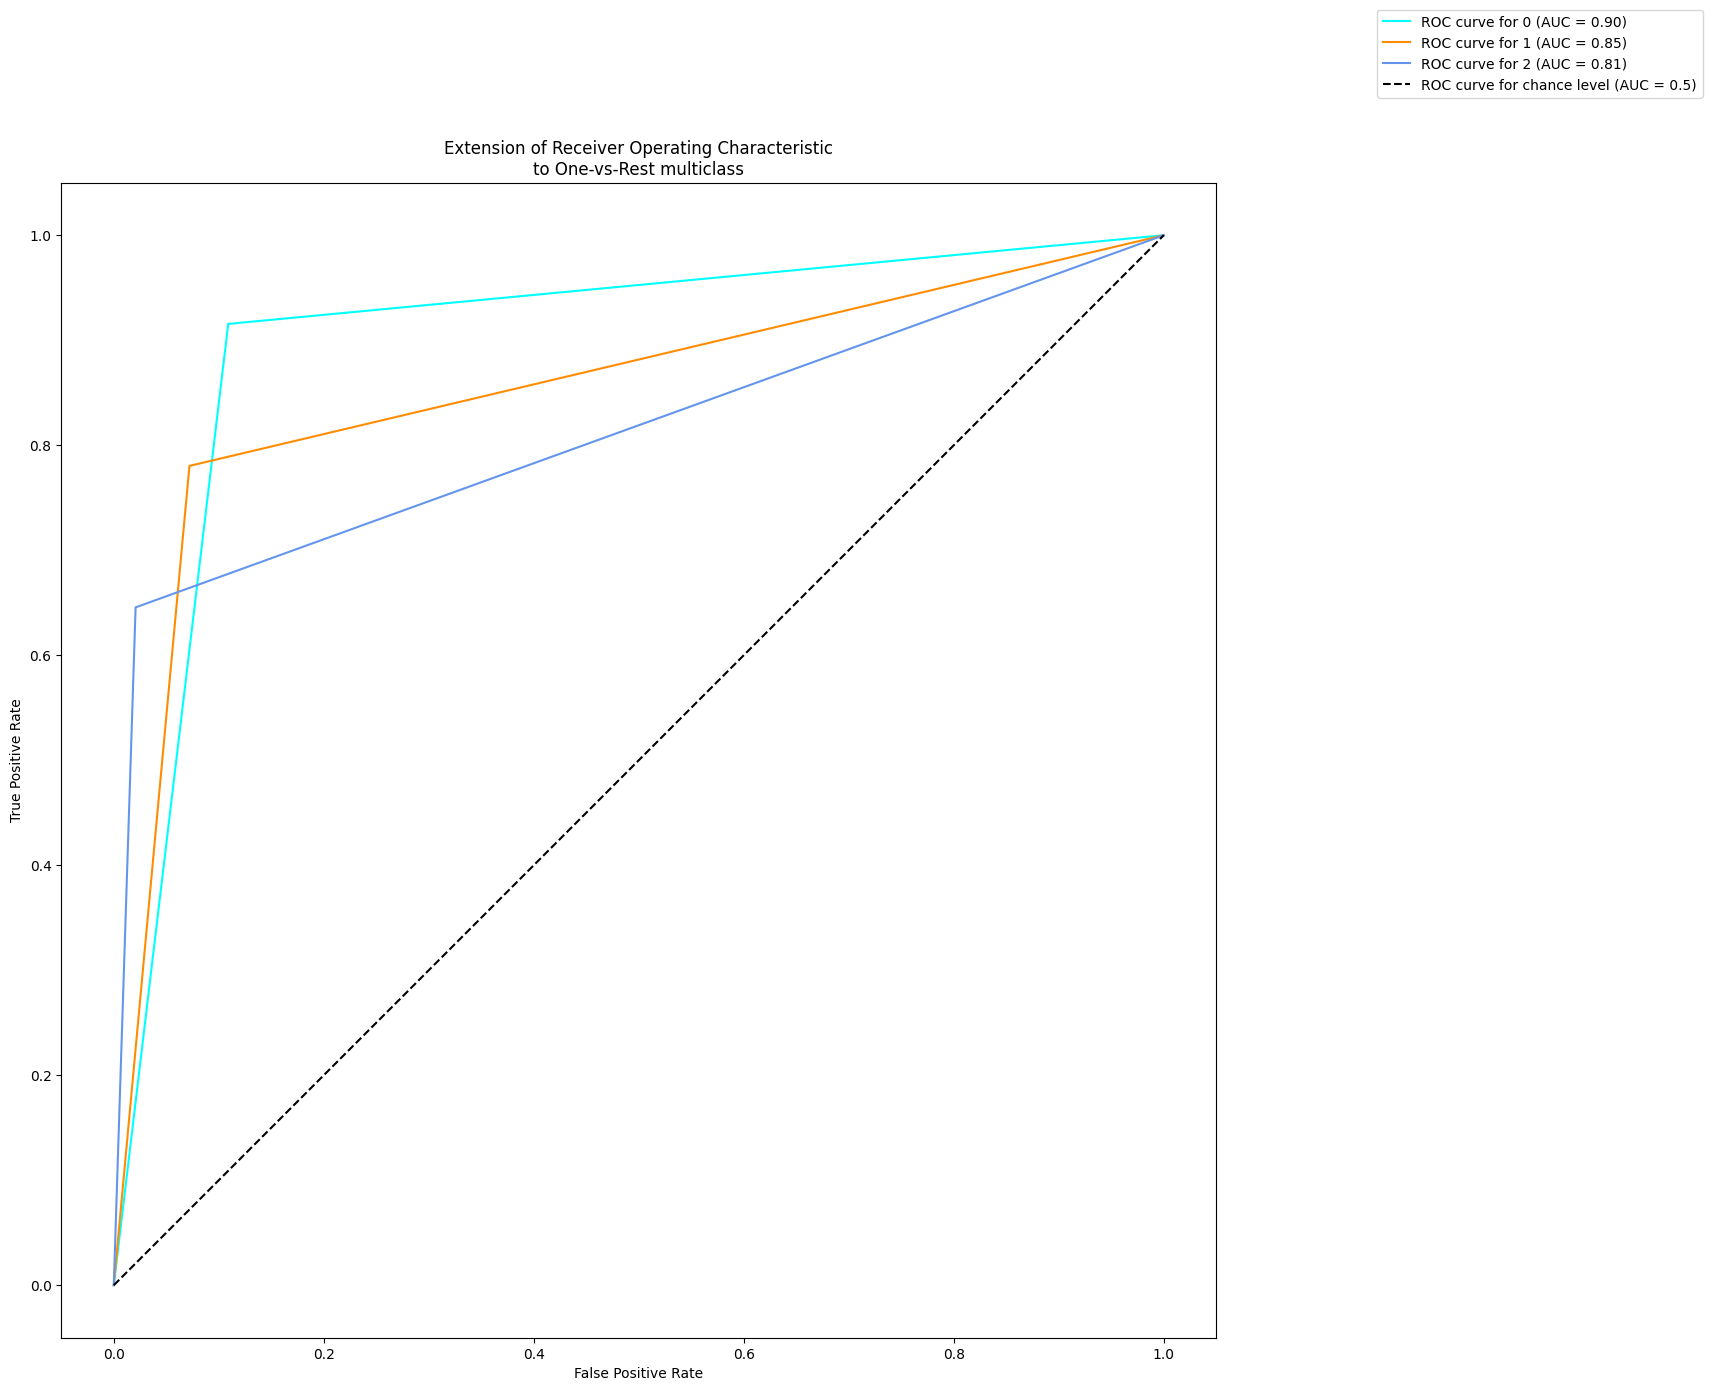

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3043
           1       0.31      0.78      0.45       132
           2       0.44      0.65      0.52        79

    accuracy                           0.90      3254
   macro avg       0.58      0.78      0.64      3254
weighted avg       0.95      0.90      0.92      3254



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66307


STAGE:2024-02-16 04:09:12 13695:13695 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.7732, macro-f1: 0.4677
Epoch 1/50 - Training Time: 20.64 seconds | Inference Time: 3.22 seconds
Epoch 2/50 - Test Accuracy: 0.8998, macro-f1: 0.6414
Epoch 2/50 - Training Time: 26.44 seconds | Inference Time: 2.33 seconds
Epoch 3/50 - Test Accuracy: 0.8457, macro-f1: 0.5966
Epoch 3/50 - Training Time: 16.21 seconds | Inference Time: 3.36 seconds
Epoch 4/50 - Test Accuracy: 0.8571, macro-f1: 0.6004
Epoch 4/50 - Training Time: 24.38 seconds | Inference Time: 3.80 seconds
Epoch 5/50 - Test Accuracy: 0.9143, macro-f1: 0.6783
Epoch 5/50 - Training Time: 13.82 seconds | Inference Time: 2.78 seconds
Epoch 6/50 - Test Accuracy: 0.7680, macro-f1: 0.5404
Epoch 6/50 - Training Time: 21.31 seconds | Inference Time: 4.38 seconds
Epoch 7/50 - Test Accuracy: 0.8623, macro-f1: 0.6301
Epoch 7/50 - Training Time: 12.65 seconds | Inference Time: 3.00 seconds
Epoch 8/50 - Test Accuracy: 0.8651, macro-f1: 0.5658
Epoch 8/50 - Training Time: 25.47 seconds | Inference Time: 3.52 

STAGE:2024-02-16 04:28:41 13695:13695 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-16 04:28:42 13695:13695 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         2.31%       25.244s        93.64%     1024.879s      80.383ms      -3.11 Gb      -3.12 Gb         12750  
                                   DataParallel.forward         0.64%        6.966s        69.92%      765.294s      60.023ms     654.62 Mb    -963.44 Mb         12750  
                                       aten::batch_norm         0.02%     239.147ms        50.59%      553.676s      21.713ms     407.08 Mb     548.50

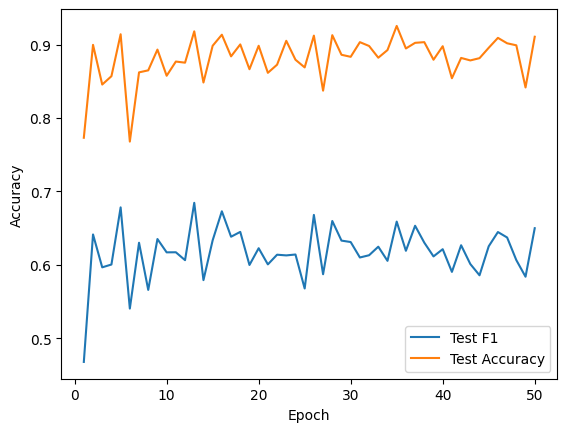

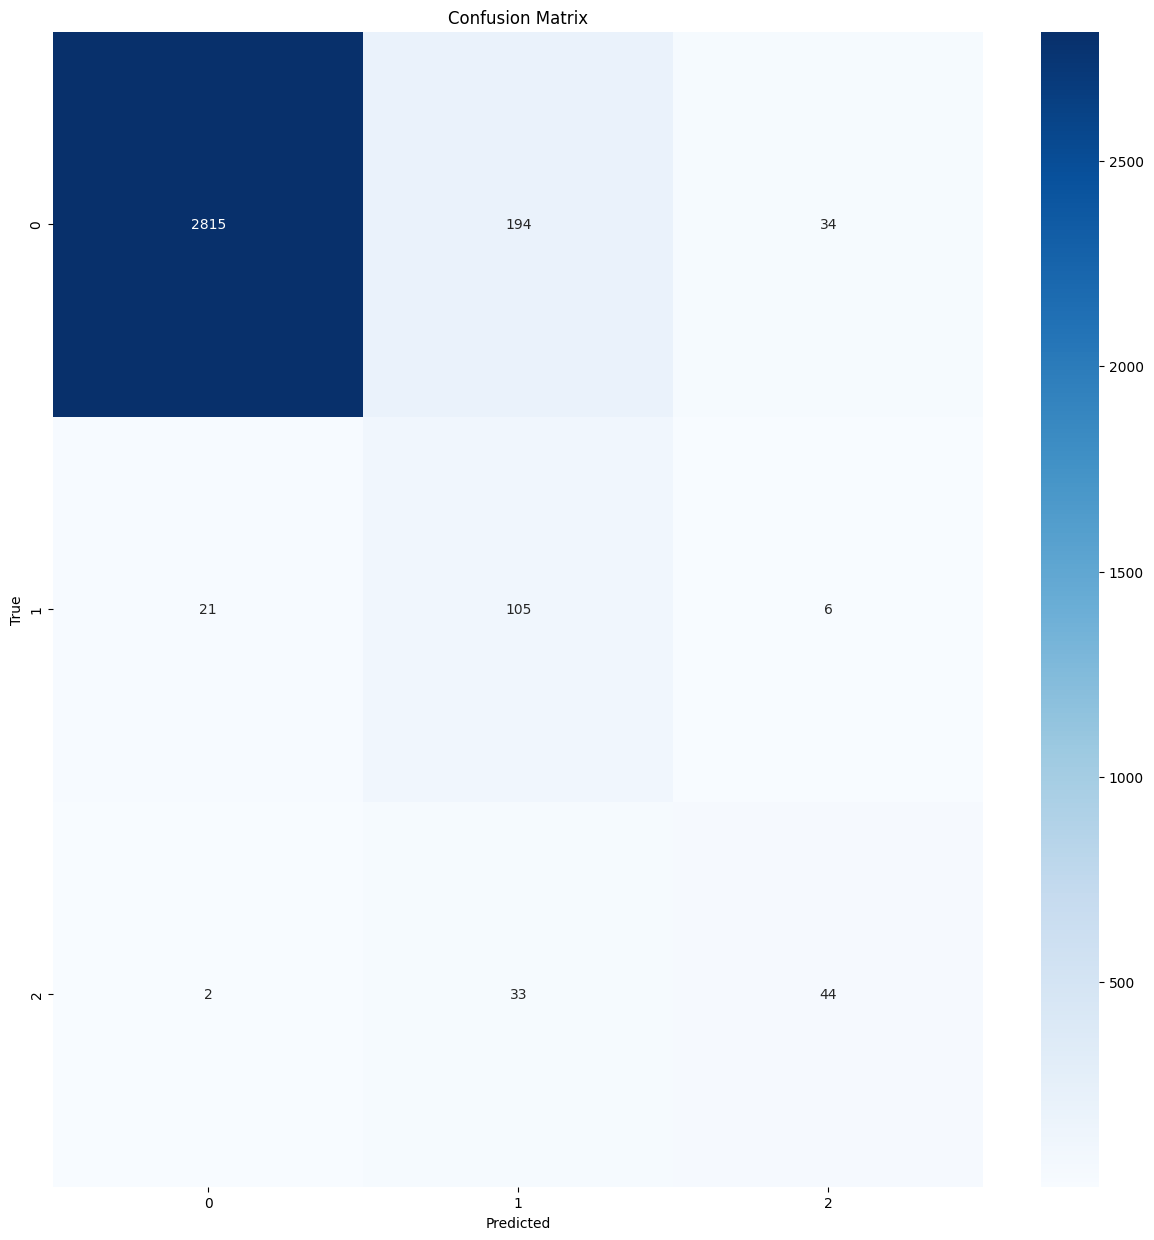

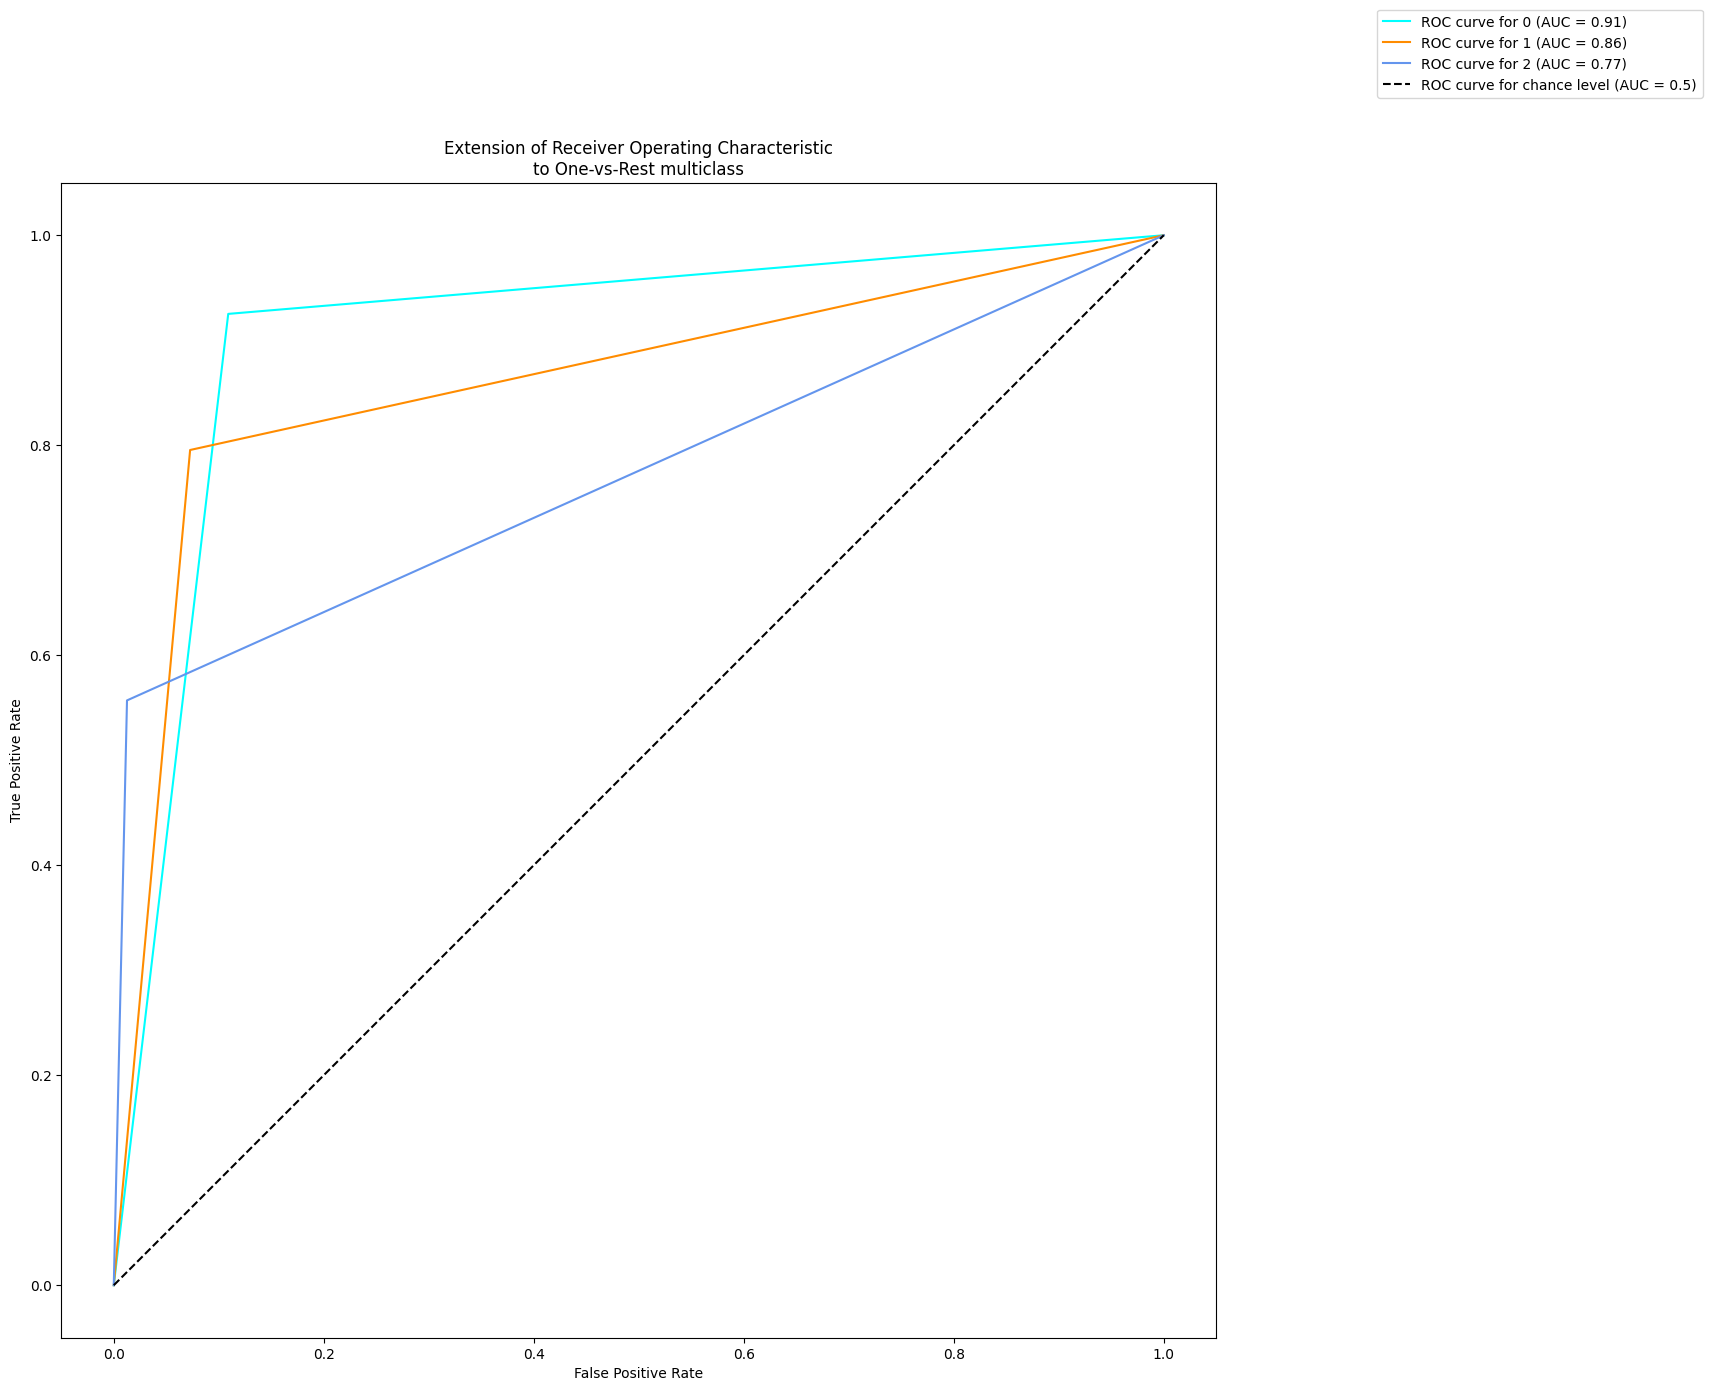

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3043
           1       0.32      0.80      0.45       132
           2       0.52      0.56      0.54        79

    accuracy                           0.91      3254
   macro avg       0.61      0.76      0.65      3254
weighted avg       0.95      0.91      0.93      3254



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)